# Pymaceuticals Inc.
---

### Observations and Insights

- The line plot of the Tumor Volume under the Capomulin regimen has a strong indicator that of the drug's effectiveness to lower tumor volumes over time, especially past 30 days.
- With a correlation coefficient of 0.84, there is a relatively strong positive correlation between Average Tumor Volumne and Weight for Mice tested for the Capomulin Regimin. From this, we may consider the observation that the higher the mouse weight, the more likely it is to observe a higher average tumor volume under the Capomulin treatment. A hypothesis can be drawn that the higher the weight, the less effective Capomulin drug can lower the tumor volumes.
- To support our regression line model, the standard error of our estimate is also relatively small (0.04), which means we expect to see that most of the observed values cluster fairly closely to this positive relationship

# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

Your tasks are to do the following:

* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

* Use the cleaned data for the remaining steps.

* Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

  * **NOTE:** These plots should look identical.

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  * **NOTE:** These plots should look identical.

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

* Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Here are some final considerations:

* You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, _x_-axis and _y_-axis limits, etc.

* See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and expected format of the notebook.


### Copyright

Trilogy Education Services © 2020. All Rights Reserved.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID" )
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(combined_mouse_data["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data.loc[(combined_mouse_data["Mouse ID"] != "g989")]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_tumor = clean_mouse_data[["Drug Regimen","Tumor Volume (mm3)"]]
drug_tumor_grp = drug_tumor.groupby("Drug Regimen")

grp_tumor_mean = drug_tumor_grp.mean()
grp_tumor_med = drug_tumor_grp.median()
grp_tumor_var = drug_tumor_grp.var()
grp_tumor_stdev = drug_tumor_grp.std()
grp_tumor_sem = drug_tumor_grp.sem()

groupdrug_summary = drug_tumor_grp.aggregate([np.sum])
groupdrug_summary["Mean Tumor Volume"] = grp_tumor_mean
groupdrug_summary["Median Tumor Volume"] = grp_tumor_med
groupdrug_summary["Tumor Volume Variance"] = grp_tumor_var
groupdrug_summary["Tumor Volume Std. Dev."] = grp_tumor_stdev
groupdrug_summary["Tumor Volume Std. Err."] = grp_tumor_sem

groupdrug_summary = groupdrug_summary[["Mean Tumor Volume","Median Tumor Volume",
                                       "Tumor Volume Variance","Tumor Volume Std. Dev.",
                                       "Tumor Volume Std. Err."]]
groupdrug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
,,,,,
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
groupdrug_summary2 = drug_tumor_grp.aggregate([np.mean,np.median,np.var,np.std,st.sem])
groupdrug_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested per Drug - Pandas'}, xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested'>

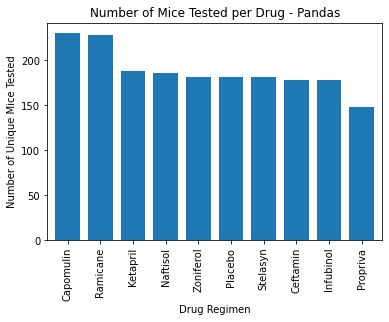

In [10]:
# Create dataframe from clean_mouse_data grouped by Drug Regimen with Sex
drug_gender = clean_mouse_data[["Drug Regimen","Sex","Tumor Volume (mm3)"]]
drug_gender_grp = drug_gender.groupby("Drug Regimen")

groupdrug_count_summary = clean_mouse_data[["Drug Regimen","Sex"]].groupby(["Drug Regimen"]).aggregate('count').sort_values(by="Sex",ascending = False)
groupdrug_gender_summary = clean_mouse_data[["Drug Regimen","Sex","Tumor Volume (mm3)"]].groupby(["Sex"]).aggregate('count').sort_values(by="Sex",ascending = False)

# Create x values list <drugs_reg> from groupdrug_summary keys
drugs_reg = groupdrug_count_summary.index.tolist()
y_value = groupdrug_count_summary["Sex"].tolist()

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pdbar_drug = groupdrug_count_summary.plot.bar(legend = False,width = 0.75, ylabel="Number of Unique Mice Tested",title="Number of Mice Tested per Drug - Pandas")
pdbar_drug

Text(0.5, 1.0, 'Number of Mice Tested per Drug - MatPlotLib')

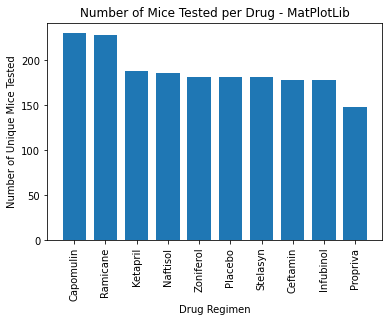

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

pltbar_drug = plt.bar(drugs_reg,y_value, width = 0.75, align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Mice Tested per Drug - MatPlotLib")

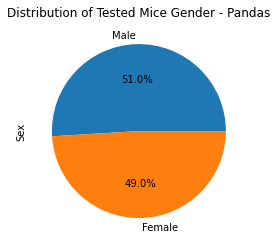

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pdpie_gender = groupdrug_gender_summary.plot.pie(y="Drug Regimen", legend = False,autopct = "%1.1f%%",
                                                 ylabel="Sex",title="Distribution of Tested Mice Gender - Pandas")


Text(0.5, 1.0, 'Distribution of Tested Mice Gender - Pyplot')

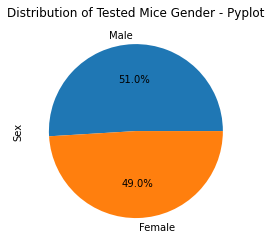

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pltpie_gender = plt.pie(groupdrug_gender_summary["Drug Regimen"].tolist(),labels = groupdrug_gender_summary.index.values.tolist() ,
                       autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Tested Mice Gender - Pyplot")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
select_drug_data = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]=="Capomulin" )|(clean_mouse_data["Drug Regimen"]=="Ramicane") | (clean_mouse_data["Drug Regimen"]=="Infubinol") | (clean_mouse_data["Drug Regimen"]== "Ceftamin"),:]

sorted_mouse_data = select_drug_data.sort_values(by=["Mouse ID","Timepoint"],ascending = False)

reduced_mouse_data = sorted_mouse_data.drop_duplicates(subset = "Mouse ID", keep = "first").reset_index(drop=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#combined_select_data = pd.merge(clean_mouse_data,reduced_mouse_data, how = "left", on = "Mouse ID" )
reduced_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,z581,Infubinol,Female,24,25,45,62.754451,3
1,z578,Ramicane,Male,11,16,45,30.638696,0
2,y865,Ceftamin,Male,23,26,45,64.729837,3
3,y793,Capomulin,Male,17,17,45,31.896238,2
4,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
95,a444,Ramicane,Female,10,25,45,43.047543,0
96,a411,Ramicane,Male,3,22,45,38.407618,1
97,a275,Ceftamin,Female,20,28,45,62.999356,3
98,a251,Infubinol,Female,21,25,45,65.525743,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
tumor_vol_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_subset = reduced_mouse_data.loc[reduced_mouse_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_list.append(drug_subset)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = drug_subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Create outlier_subset list to look for outliers outside of quartile bounds and print results
    outlier_subset = reduced_mouse_data.loc[(reduced_mouse_data["Drug Regimen"] == drug) & ((reduced_mouse_data["Tumor Volume (mm3)"] > upper_bound)|(reduced_mouse_data["Tumor Volume (mm3)"] < lower_bound)) , "Tumor Volume (mm3)"]
    
    print(f"{drug}'s' potential outliers: {outlier_subset}")
    

#Please note that for the Infubinol's Outlier output will differ from due to the reseting of index

Capomulin's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's' potential outliers: 84    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<ipython-input-16-df976fa1f3f4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatment_list)


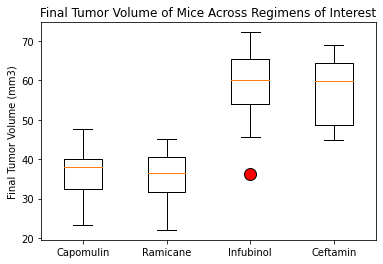

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice Across Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatment_list)
ax1.set
flierprops = dict(marker='o', markerfacecolor='red', markersize=12.0,)
ax1.boxplot(tumor_vol_list,flierprops=flierprops)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

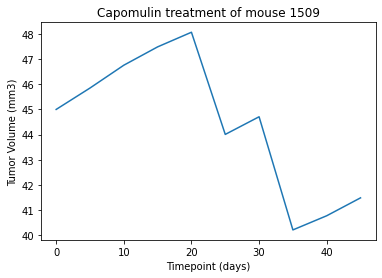

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

I509_df = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509", :]
x_value = I509_df["Timepoint"].tolist()

I509_plot, = plt.plot(x_value,I509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create the dataframe to plot data from, calculating Average Tumor Volumne by Mouse ID tested for Capomulin

capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
capomulin_id = capomulin_df.groupby("Mouse ID")

capomulin_summary = capomulin_id.aggregate([np.mean])
capomulin_summary["Average Tumor Volumne (mm3)"]= capomulin_summary[('Tumor Volume (mm3)', 'mean')]
capomulin_summary=capomulin_summary["Average Tumor Volumne (mm3)"]

merge_capomulin = pd.merge(capomulin_df,capomulin_summary,how = "left",on="Mouse ID")

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

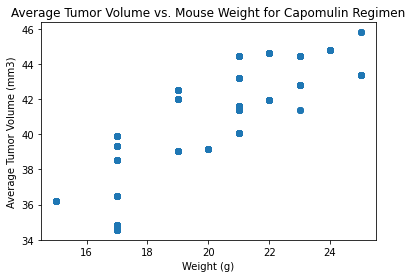

In [19]:
# Plot scatter plot with appropriate aesthetics

plt.scatter(merge_capomulin["Weight (g)"].tolist(),merge_capomulin["Average Tumor Volumne (mm3)"].tolist(),marker = "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

## Correlation and Regression

The correlation between mouse weight and the average tumor volumne is 0.834


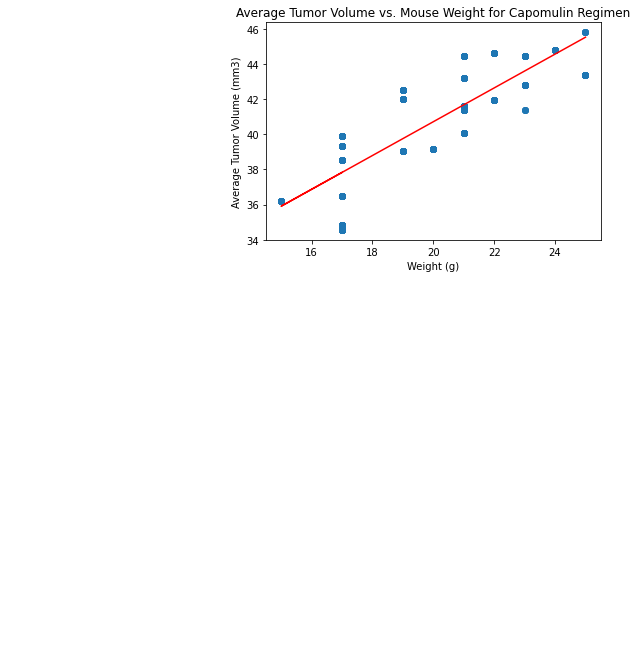

The Standard Error for our Regression Line is 0.04203886745939225


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = merge_capomulin["Weight (g)"]
y_values = merge_capomulin["Average Tumor Volumne (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The correlation between mouse weight and the average tumor volumne is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()

print(f'The Standard Error for our Regression Line is {stderr}')
print(f'The sample mean is: {})